# Beginner-Friendly Regression Tutorial: California Housing Dataset

Welcome! This notebook will guide you step-by-step through a hands-on regression workflow using the California Housing dataset from scikit-learn. You will learn how to:

- Load and explore data
- Preprocess and clean data using custom utility tools
- Build and evaluate a regression model
- Visualize results and feature importances

Let's get started!

In [10]:
# 1. Add project root to sys.path so we can import custom modules from anywhere
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

## 2. Setup: Import Libraries and Configure Environment

Let's import the necessary Python libraries and set up our environment.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from src.utility import DataFramePreprocessor, FeatureEngineeringSelector, GraphAnalyzerEngine, VisualizerFactory

## 3. Load the California Housing Dataset

We'll use the California Housing dataset, a classic regression dataset available in scikit-learn.

In [12]:
# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4. Explore and Analyze the Dataset

Let's take a look at the data, check for missing values, and get some basic statistics. We'll also use our utility tools for an initial overview.

In [13]:
# Show info and check for missing values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Missing values per column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
# Use DataFramePreprocessor for initial overview and cleaning
preproc = DataFramePreprocessor(fill_strategy='none', encoding='none')
overview = preproc.dataset_overview(df)
print("Basic stats:\n", overview['stats'])
print("\nColinear pairs (correlation >= 0.8):", overview['colinear_pairs'])

Basic stats:
                  variance  unique_values  nan_counts    dtype
MedInc       3.609323e+00          12928           0  float64
HouseAge     1.583963e+02             52           0  float64
AveRooms     6.121533e+00          19392           0  float64
AveBedrms    2.245915e-01          14233           0  float64
Population   1.282470e+06           3888           0  float64
AveOccup     1.078700e+02          18841           0  float64
Latitude     4.562293e+00            862           0  float64
Longitude    4.014139e+00            844           0  float64
MedHouseVal  1.331615e+00           3842           0  float64

Colinear pairs (correlation >= 0.8): [('AveRooms', 'AveBedrms', 0.8476213257130424), ('Latitude', 'Longitude', -0.9246644339150366)]


## 5. Preprocess Data Using Custom Utility Tools

Let's preprocess the data. For this dataset, there are no categorical variables, but we'll demonstrate scaling and missing value handling.

In [15]:
# Preprocess data: scale features, no encoding needed
preproc = DataFramePreprocessor(fill_strategy='none', encoding='none')
df_clean = preproc.fit_transform(df)
df_clean.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 6. Feature Engineering and Selection

We'll use a model-based strategy to select informative features for regression.

In [16]:
# Separate features and target
X = df_clean.drop(columns=['MedHouseVal'])
y = df_clean['MedHouseVal']

strategies = [
    {
        "name": "model_importance",
        "model_cls": RandomForestRegressor,
        "threshold": "mean"
    }
]

fes = FeatureEngineeringSelector(
    strategies=strategies,
    problem_type='regression',
    random_state=42
)

X_transformed = fes.fit_transform(X, y)
print("✓ Selected features:", fes.get_support())
print("✓ Transformation history:")
for step in fes.get_history():
    print("  •", step)
print("✓ Transformed shape:", X_transformed.shape)
print("\nPreview of transformed features:")
X_transformed.head()

✓ Selected features: ['MedInc', 'AveOccup']
✓ Transformation history:
  • {'step': 'model_importance', 'selected': ['MedInc', 'AveOccup'], 'importances': [0.5200363919014162, 0.0529625152952089, 0.044514512116075655, 0.02930497062869052, 0.031229952519458502, 0.13640343813828593, 0.09285208561382337, 0.09269613378704109]}
✓ Transformed shape: (20640, 2)

Preview of transformed features:


,MedInc,AveOccup
0,8.3252,2.555556
1,8.3014,2.109842
2,7.2574,2.802260
3,5.6431,2.547945
4,3.8462,2.181467


## 7. Train and Evaluate a Regression Model

Now, let's train a regression model and evaluate its performance using RMSE and R² metrics.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([
    ('model', RandomForestRegressor(random_state=42))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')
print(f'Mean Absolute Error: {mean_abs_error:.3f}')

RMSE: 0.505
R²: 0.805
Mean Absolute Error: 0.328


## 8. Visualize Regression Results and Feature Importances

Let's visualize the predicted vs actual values and feature importances using our utility tools.

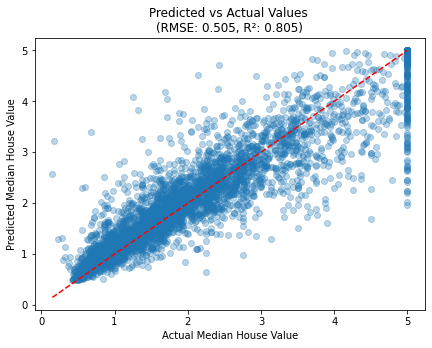

In [30]:
# Plot predicted vs actual values
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs Actual Values \n(RMSE: {:.3f}, R²: {:.3f})'.format(rmse, r2))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## 9. Conclusion and Next Steps

Congratulations! You have completed a full regression workflow on the California Housing dataset:

- Data loading and exploration
- Preprocessing and cleaning with custom utilities
- Feature engineering and selection
- Model training and evaluation
- Visualization of results and feature importances

Feel free to experiment with different models, parameters, or datasets!